<a href="https://colab.research.google.com/github/pafernannapi18/GithubIntro/blob/main/23_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the dependencies
import numpy as np
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [2]:
def gini_impurity(n_t, c_n):
  a = 0
  for i in c_n:
    a += (i/n_t)**2
  gini = 1-a
  return gini

In [3]:
gini_impurity(30, [15.0, 15.0])

0.5

In [4]:
gini_impurity(45, [15, 15, 15])

0.6666666666666667

In [5]:
gini_impurity(30, [18, 12])

0.48

In [6]:
gini_impurity(30, [30, 0])

0.0

In [7]:
def information_gain(ln_class, rn_class):
  n1 = sum(ln_class)
  n2 = sum(rn_class)
  p_sample = n1 + n2
  p_class = ln_class + rn_class
  p_gini = gini_impurity(p_sample, p_class)
  gini_n1 = gini_impurity(n1, ln_class)
  gini_n2 = gini_impurity(n2, rn_class)
  IG = p_gini- ((n1/p_sample)*gini_n1) - ((n2/p_sample)*gini_n2) 
  return IG

In [8]:
information_gain(np.array([10,30]), np.array([20,5]))

0.14319526627218937

## Decission Tree From Scratch

In [9]:
class ScratchDecesionTreeClassifier():
  def _gini_impurity(self, X, y):
    a = 0 
    for i in np.unique(y):
      a += (len(y[y[:, 0]==i]) / len(X)) ** 2 
    self.gini = 1 - a
    return self.gini

  def _info_gain(self, X, y):
    n = len(X)
    IG = self._gini_impurity(X, y) - len(self.X_left) / n * self._gini_impurity(
        self.X_left, self.y_left) - len(self.X_right) / n * self._gini_impurity(
            self.X_right, self.y_right)
    return IG 
  def fit(self, X, y):
    self.list_info_gain_max = []
    self.threshold_max = []

    for i in range(X.shape[1]):
      self.list_info_gain = []
      self.Threshold = []

      for j in np.unique(X[:,i]):
        self.Threshold.append(j)
        self.X_right = X[X[:,i] >= j]
        self.y_right = y[X[:,i] >= j] 
        self.X_left = X[X[:,i] < j]
        self.y_left = y[X[:,i] < j]
        self.list_info_gain.append(self._info_gain(X, y))

      self.list_info_gain_max.append(max(self.list_info_gain))
      self.ind = self.list_info_gain.index(max(self.list_info_gain))
      self.threshold_max.append(self.Threshold[self.ind])

    self.ind2 = self.list_info_gain_max.index(max(self.list_info_gain_max))
    self.decision_threshold = self.threshold_max[self.ind2]
    self.Greater_label = stats.mode(y[X[: , self.ind2] >= self.decision_threshold]).mode
    self.Less_label = stats.mode(y[X[: , self.ind2] < self.decision_threshold]).mode

  def predict(self,X):
    self.y_pred = np.zeros(X.shape[0]).reshape(X.shape[0], 1)
    self.y_pred[X[:, self.ind2] >= self.decision_threshold] = self.Greater_label
    self.y_pred[X[:, self.ind2] < self.decision_threshold] = self.Less_label
    return self.y_pred  

## Predict Function

In [10]:
def information_gain(ln_class, rn_class):
  n1 = sum(ln_class)
  n2 = sum(rn_class)
  p_sample = n1 + n2 
  p_class = ln_class + rn_class

In [11]:
iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
X = X[:, [2,3]]
y = np.where(y == 1, 1, 0)
y = y.reshape(100, 1)
iris = np.hstack((y, X))
np.unique(iris[:,0])

array([0., 1.])

In [12]:
ScDT = ScratchDecesionTreeClassifier()
ScDT.fit(X, y)

In [13]:
ScDT.predict(X)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [14]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)
ScDT = ScratchDecesionTreeClassifier()
ScDT.fit(X_train, y_train)
y_pred = ScDT.predict(X_test)

In [15]:
print("{}".format(precision_score(y_test, y_pred)))
print("{}".format(recall_score(y_test, y_pred)))
print("{}".format(f1_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

1.0
0.7333333333333333
0.846153846153846
[[15  0]
 [ 4 11]]


## Decision region

In [16]:
def decision_region(X, y, model, step=0.01, title='decision tree', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor','virginica']):
  #setting
  scatter_color = ['red', 'blue']
  contourf_color = ['pink', 'skyblue']
  n_class = 2
  # pred
  mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
  mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
  y_pred = model.predict(mesh).reshape(mesh_f0.shape)

  #plot
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors ='y', linewidth =3, alpa =0.5)
  for i, target in enumerate(set(y)):
    plt.scatter(X[y==target][:, 0], X[y==target][:,1], s=80, color = scatter_color[i], label=target_names[i], marker='o')
  patches = [mpatches.Patch(color=scatter_color[i], label = target_names[i]) for i in range(n_class)]
  plt.legend(handles=patches)
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth', 'alpa'
  app.launch_new_instance()


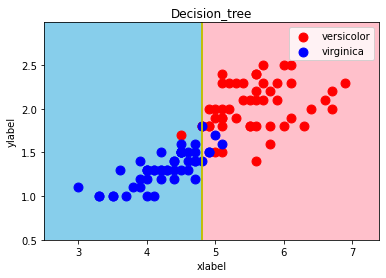

In [17]:
decision_region(X = X, y= y[:,0], model = ScDT, step = 0.01, title='Decision_tree', xlabel='xlabel', ylabel = 'ylabel')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth', 'alpa'
  app.launch_new_instance()


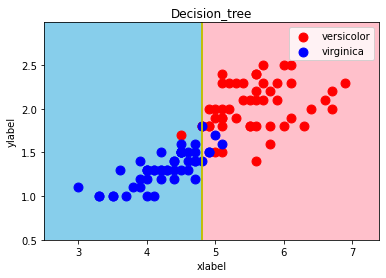

In [18]:
decision_region(X = X, y= y[:,0], model = ScDT, step = 0.01, title='Decision_tree', xlabel='xlabel', ylabel = 'ylabel')